In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno 
df = pd.read_csv("data.csv", skiprows = 41)
#df.head(5)

/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Drop invalid data 
df = df.drop(df[(df.PSAL < 2)].index)
df = df.drop(df[(df.PSAL > 41)].index)
#len(df)
df = df.drop(df[(df.CPHL < 0)].index)
df = df.drop(df[(df.CPHL > 100)].index)
#len(df)
df = df.drop(df[(df.CDOM < 0)].index)
df = df.drop(df[(df.CDOM > 400)].index)
#len(df)
df = df.drop(df[(df.VBSC < 0)].index)
df = df.drop(df[(df.VBSC > 0.1)].index)
#len(df)
df = df.drop(df[(df.IRRAD555 < 0) ].index)
df = df.drop(df[(df.IRRAD555 > 1000)].index)
len(df)

3101188

In [3]:
# There are 7 different delployment in total
name=df.deployment_name.unique()
print(name)

['TwoRocks20130215' 'Leeuwin20131017' 'AIMS20151127'
 'LizardIsland20131024' 'SpencerGulf20131031' 'TwoRocks20140808'
 'StormBay20141017']


In [4]:
# Delete invalid columns VCUR,UCUR and NTRA
SG_13 = df[df['deployment_name'] == 'SpencerGulf20131031']
del SG_13['NTRA']
del SG_13['UCUR']
del SG_13['VCUR']

from numpy import where
from netCDF4 import Dataset, num2date
from matplotlib.pyplot import figure, xlabel, ylabel, title, show

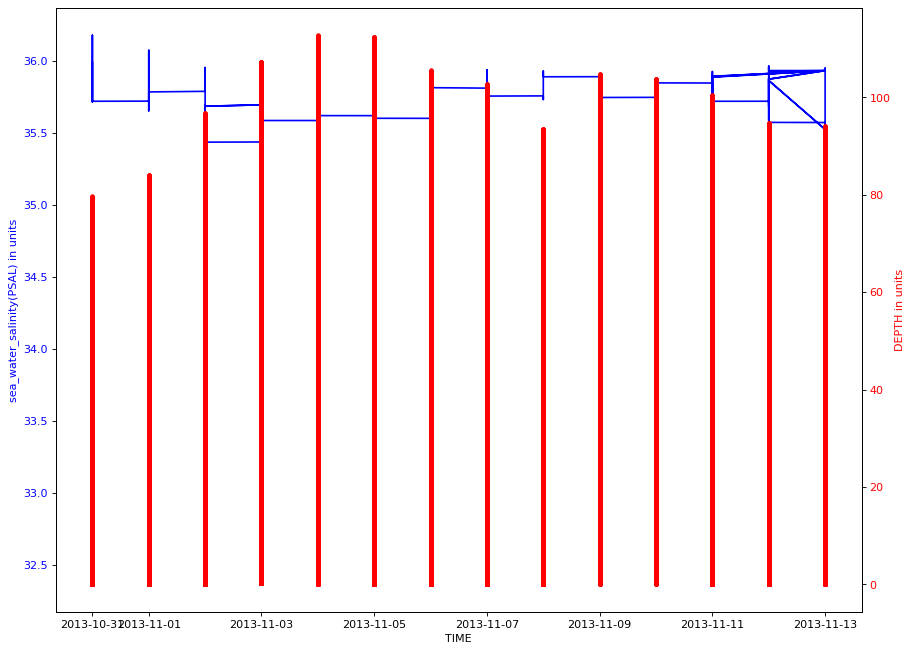

In [5]:
# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(SG_13['TIME']).dt.date.values
psalData = SG_13['PSAL'].values
depthData = SG_13['DEPTH'].values

# plot depth and salinity(psal) timeseries
figure1 = figure( figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

ax1 = figure1.add_subplot(111)
ax1.plot(TIME,psalData, 'b-')
ax1.set_xlabel('TIME')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('sea_water_salinity(PSAL)' + ' in units', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(TIME,depthData, 'r.')
ax2.set_ylabel('DEPTH' + ' in units', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

show()

In [10]:
# PSAL: sea_water_salinity

# Find the unique value in PSAL_quality_control
psalQ = SG_13.PSAL_quality_control.unique()
print(psalQ)

psalMissing = SG_13.loc[df['PSAL_quality_control'] == 9.]
print("the number of missing value data is",len(psalMissing))
print("the ratio of missing value data v.s. total data is",round(len(psalMissing)/len(SG_13),3))

# The percentage of bad data and missing value data is low, we could just delete them
# Update the SG_13
SG_13 = SG_13[(SG_13['PSAL_quality_control'] != 9.)]

[1. 3. 9.]
the number of missing value data is 2
the ratio of missing value data v.s. total data is 0.0


In [11]:
# PROFILE: glider_trajectory_profile_number

proQ = SG_13.PROFILE_quality_control.unique()
print('the quality type of PROFILE are',proQ)

the quality type of PROFILE are [0.]


In [13]:
# DOX2:standard_name: moles_of_oxygen_per_unit_mass_in_sea_water

dox2Q = SG_13.DOX2_quality_control.unique()
print('the quality type of DOX2 are',dox2Q)
dox2missing = SG_13.loc[df['DOX2_quality_control'] == 9.]
print('number of missing value is:',len(dox2missing),'and the pecentage is',round(len(dox2missing)/len(SG_13),4)*100,'%')



the quality type of DOX2 are [9. 1. 3.]
number of missing value is: 36101 and the pecentage is 6.69 %


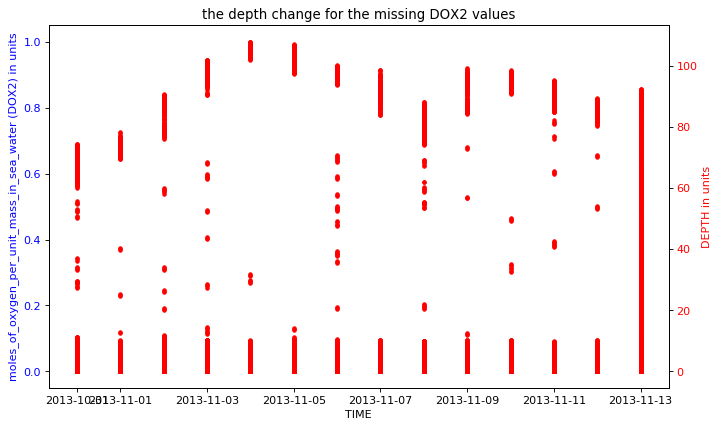

In [14]:
# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(dox2missing['TIME']).dt.date.values
dox2Data = dox2missing['DOX2'].values
depthData = dox2missing['DEPTH'].values

# plot depth and DOX2 missing value timeseries
figure1 = figure( figsize=(10,6 ), dpi=80, facecolor='w', edgecolor='k')

ax1 = figure1.add_subplot(111)
ax1.plot(TIME,dox2Data, 'b-')
ax1.set_xlabel('TIME')
ax1.set_title('the depth change for the missing DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(TIME,depthData, 'r.')
ax2.set_ylabel('DEPTH' + ' in units', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

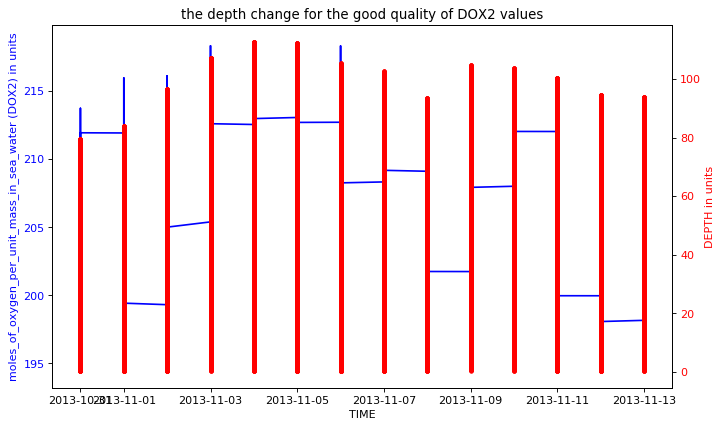

In [15]:
# good quality DOX2
dox2Valid=SG_13.loc[df['DOX2_quality_control'] == 1.]
TIME = pd.to_datetime(dox2Valid['TIME']).dt.date.values
dox2vData = dox2Valid['DOX2'].values
depthvData = dox2Valid['DEPTH'].values

# plot depth and DOX2 good quality data timeseries
figure2 = figure( figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

ax3 = figure2.add_subplot(111)
ax3.plot(TIME,dox2vData, 'b-')
ax3.set_xlabel('TIME')
ax3.set_title('the depth change for the good quality of DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax3.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for t3 in ax3.get_yticklabels():
    t3.set_color('b')

ax4 = ax3.twinx()
ax4.plot(TIME,depthvData, 'r.')
ax4.set_ylabel('DEPTH' + ' in units', color='r')
for t4 in ax4.get_yticklabels():
    t4.set_color('r')

show()

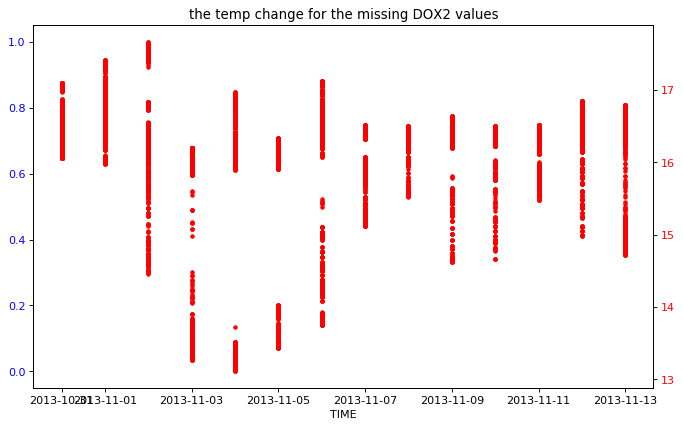

In [17]:
# Temp
TIME = pd.to_datetime(dox2missing['TIME']).dt.date.values
dox2Data = dox2missing['DOX2'].values
tempData = dox2missing['TEMP'].values

# plot depth and DOX2 missing value timeseries
figure3 = figure( figsize=(10,6 ), dpi=80, facecolor='w', edgecolor='k')

ax5 = figure3.add_subplot(111)
ax5.plot(TIME,dox2Data, 'b-')
ax5.set_xlabel('TIME')
ax5.set_title('the temp change for the missing DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for tl in ax5.get_yticklabels():
    tl.set_color('b')

ax6 = ax5.twinx()
ax6.plot(TIME,tempData, 'r.')
ax2.set_ylabel('TEMP' + ' in units', color='r')
for tl in ax6.get_yticklabels():
    tl.set_color('r')
    

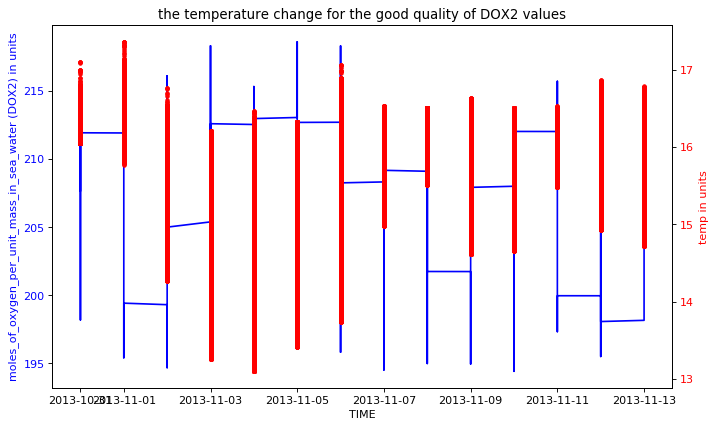

In [18]:
# good quality DOX2
dox2Valid=SG_13.loc[df['DOX2_quality_control'] == 1.]
TIME = pd.to_datetime(dox2Valid['TIME']).dt.date.values
dox2vData = dox2Valid['DOX2'].values
tempvData = dox2Valid['TEMP'].values

# plot depth and DOX2 good quality data timeseries
figure4 = figure( figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

ax6 = figure4.add_subplot(111)
ax6.plot(TIME,dox2vData, 'b-')
ax6.set_xlabel('TIME')
ax6.set_title('the temperature change for the good quality of DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax6.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for t3 in ax6.get_yticklabels():
    t3.set_color('b')

ax7 = ax6.twinx()
ax7.plot(TIME,tempvData, 'r.')
ax7.set_ylabel('temp' + ' in units', color='r')
for t4 in ax7.get_yticklabels():
    t4.set_color('r')

show()

In [19]:
# corr plot for each variable, select those with corr>0.5 as training features
corr = dox2Valid.corr() 
corr.style.background_gradient(cmap='coolwarm')

/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax
/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,file_id,TIME_quality_control,LATITUDE,LATITUDE_quality_control,LONGITUDE,LONGITUDE_quality_control,PRES,PRES_quality_control,DEPTH,DEPTH_quality_control,PROFILE,PROFILE_quality_control,PHASE,PHASE_quality_control,TEMP,TEMP_quality_control,PSAL,PSAL_quality_control,DOX1,DOX1_quality_control,DOX2,DOX2_quality_control,CPHL,CPHL_quality_control,CDOM,CDOM_quality_control,CNDC,CNDC_quality_control,VBSC,VBSC_quality_control,NTRA_quality_control,UCUR_quality_control,VCUR_quality_control,HEAD,HEAD_quality_control,UCUR_GPS,UCUR_GPS_quality_control,VCUR_GPS,VCUR_GPS_quality_control,IRRAD443,IRRAD443_quality_control,IRRAD490,IRRAD490_quality_control,IRRAD555,IRRAD555_quality_control,IRRAD670,IRRAD670_quality_control
file_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TIME_quality_control,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
LATITUDE,nan,nan,1.000000,0.011227,-0.874973,0.011227,-0.043362,nan,-0.043319,nan,0.778870,nan,0.013447,nan,0.467244,nan,0.575596,nan,-0.045337,nan,-0.067466,nan,0.181733,-0.001813,0.107081,-0.001656,0.508858,nan,-0.082665,-0.001656,nan,nan,nan,-0.322993,0.003045,nan,nan,nan,nan,-0.004138,-0.013691,0.001044,-0.013753,0.013632,-0.013691,0.008918,-0.013024
LATITUDE_quality_control,nan,nan,0.011227,1.000000,-0.014349,1.000000,0.114594,nan,0.114604,nan,0.011389,nan,0.067753,nan,-0.042968,nan,-0.005154,nan,-0.043400,nan,-0.047314,nan,0.060908,-0.222830,0.056936,-0.224121,-0.035336,nan,-0.047700,-0.224121,nan,nan,nan,0.058748,0.002012,nan,nan,nan,nan,-0.069785,-0.067875,-0.062007,-0.067859,-0.100034,-0.067875,-0.286640,-0.067815
LONGITUDE,nan,nan,-0.874973,-0.014349,1.000000,-0.014349,-0.046316,nan,-0.046349,nan,-0.942769,nan,-0.025222,nan,-0.270915,nan,-0.251560,nan,-0.003653,nan,0.008097,nan,-0.095594,0.003230,-0.045412,0.003100,-0.279262,nan,0.220762,0.003100,nan,nan,nan,0.222696,-0.003395,nan,nan,nan,nan,0.022231,0.025215,0.019495,0.025246,0.005745,0.025215,-0.000406,0.024482
LONGITUDE_quality_control,nan,nan,0.011227,1.000000,-0.014349,1.000000,0.114594,nan,0.114604,nan,0.011389,nan,0.067753,nan,-0.042968,nan,-0.005154,nan,-0.043400,nan,-0.047314,nan,0.060908,-0.222830,0.056936,-0.224121,-0.035336,nan,-0.047700,-0.224121,nan,nan,nan,0.058748,0.002012,nan,nan,nan,nan,-0.069785,-0.067875,-0.062007,-0.067859,-0.100034,-0.067875,-0.286640,-0.067815
PRES,nan,nan,-0.043362,0.114594,-0.046316,0.114594,1.000000,nan,1.000000,nan,0.056330,nan,0.051682,nan,-0.636467,nan,-0.288547,nan,-0.785138,nan,-0.755725,nan,0.293721,-0.032690,0.639219,-0.032550,-0.574768,nan,0.177236,-0.032550,nan,nan,nan,0.046459,-0.004087,nan,nan,nan,nan,-0.420993,-0.052855,-0.415773,-0.052753,-0.386204,-0.052855,-0.177331,-0.052955
PRES_quality_control,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DEPTH,nan,nan,-0.043319,0.114604,-0.046349,0.114604,1.000000,nan,1.000000,nan,0.056360,nan,0.051684,nan,-0.636420,nan,-0.288500,nan,-0.785129,nan,-0.755725,nan,0.293761,-0.032693,0.639223,-0.032553,-0.574720,nan,0.177227,-0.032553,nan,nan,nan,0.046444,-0.004087,nan,nan,nan,nan,-0.421009,-0.052855,-0.415787,-0.052754,-0.386223,-0.052855,-0.177344,-0.052955
DEPTH_quality_control,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [24]:
# Data Imputation for DOX2

# Train-test split
# Select features with corr>0.3, PROFILE: glider_trajectory_profile_number is an exception, it has a great impact 
# on the model
X = dox2Valid[['PRES','TEMP','DEPTH','DOX1','CDOM','IRRAD443','IRRAD490','PROFILE']]
# Target value
y = dox2Valid['DOX2'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Import knn 
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
model = knn.fit(X_train,y_train.astype('int'))
y_pred = knn.predict(X_test)

# Test the accuracy score of the model
from sklearn.metrics import accuracy_score
print('the accuracy of testing data on DOX2 is:',accuracy_score(y_test.astype('int'), y_pred))

the accuracy of testing data on DOX2 is: 0.8928851596246462


In [26]:
missing_dox2= dox2missing['DOX2']
#predict the DOX2 value for the whole SG_13 dataset
df_missing_dox2 = pd.DataFrame(SG_13[['PRES','TEMP','DEPTH','DOX1','CDOM','IRRAD443','IRRAD490','PROFILE']])
imputed_dox2 = model.predict(df_missing_dox2)
print('the array of knn prediction:',imputed_dox2)

the array of knn prediction: [212 212 209 ... 211 211 212]


In [27]:
# Filling the missing values with knn imputation result
indicies_of_missing = SG_13[SG_13['DOX2'].isnull()].index # list of the missing indices
SG_13.head(5)
for fill_index, dataframe_index in enumerate(indicies_of_missing):
    if pd.isnull(SG_13.loc[dataframe_index, 'DOX2']):
        SG_13.loc[dataframe_index,'DOX2'] = imputed_dox2[fill_index]
    else:
        continue

In [28]:
print("the number of missing DOX2 after imputation is", SG_13['DOX2'].isnull().sum())
# Data imputataion for DOX2 done

the number of missing DOX2 after imputation is 0


In [31]:
#VBSC: volume_scattering_function
vbscQ = SG_13.VBSC_quality_control.unique() 
print(vbscQ)
vbscBad=SG_13.loc[df['VBSC_quality_control'] == 4.]
print('the number of bad_data for VBSC',len(vbscBad),', and the pecentage is',round(len(vbscBad)/len(SG_13),4)*100,'%')
# Drop bad data and update Two_13
SG_13 = SG_13[(SG_13['VBSC_quality_control'] != 4.)]

[4. 1.]
the number of bad_data for VBSC 25981 , and the pecentage is 4.81 %


In [33]:
# IRRAD443 downwelling_spectral_irradiance_in_sea_water_beam1

ir443Q = SG_13.IRRAD443_quality_control.unique()
print('type of IRRAD443',ir443Q) 

ir443bad=SG_13.loc[df['IRRAD443_quality_control'] == 4.]
print('the number of bad data for IRRAD443',len(ir443bad),', and the pecentage is',round(len(ir443bad)/len(SG_13),4)*100,'%')
# Drop bad data and update Two_13
SG_13 = SG_13[(SG_13['IRRAD443_quality_control'] != 4.)]

type of IRRAD443 [4. 1.]
the number of bad data for IRRAD443 256453 , and the pecentage is 49.919999999999995 %


In [38]:
# HEAD: vehicle_heading
headQ = SG_13.HEAD_quality_control.unique()
print('type of HEAD',headQ) 
head_missing=SG_13.loc[df['HEAD_quality_control'] == 9.]
print('the number of missing data for HEAD',len(head_missing),', and the pecentage is',round(len(head_missing)/len(SG_13),4)*100,'%')
# Only a small number of HEAD is missing, we could just delete them.
# Drop missing value for HEAD and update Two_13
SG_13 = SG_13[(SG_13['HEAD_quality_control'] != 9.)]

type of HEAD [0. 9.]
the number of missing data for HEAD 201 , and the pecentage is 0.08 %


In [40]:
del SG_13['NTRA_quality_control']
del SG_13['UCUR_quality_control']
del SG_13['VCUR_quality_control']
#UCUR can only be calculated when the glider is close to the surface and gets an updated GPS fix
#Thus UCUR_GPS and VCUR_GPS null value can be deleted

del SG_13['UCUR_GPS']
del SG_13['UCUR_GPS_quality_control']
del SG_13['VCUR_GPS']
del SG_13['VCUR_GPS_quality_control']
print(SG_13.isnull().sum())
# LATITUDE, LONGITUDE, DEPTH, HEAD, geom still have null value

FID                          0
file_id                      0
deployment_name              0
platform_type                0
platform_code                0
time_coverage_start          0
time_coverage_end            0
TIME                         0
TIME_quality_control         0
LATITUDE                     0
LATITUDE_quality_control     0
LONGITUDE                    0
LONGITUDE_quality_control    0
PRES                         0
PRES_quality_control         0
DEPTH                        0
DEPTH_quality_control        0
PROFILE                      0
PROFILE_quality_control      0
PHASE                        0
PHASE_quality_control        0
TEMP                         0
TEMP_quality_control         0
PSAL                         0
PSAL_quality_control         0
DOX1                         0
DOX1_quality_control         0
DOX2                         0
DOX2_quality_control         0
CPHL                         0
CPHL_quality_control         0
CDOM                         0
CDOM_qua

In [41]:
len(SG_13)

257086

In [42]:
#----------'SpencerGulf20131031'---------  output the rawdata as CSV
SG_13.to_csv (r'SpencerGulf20131031.csv', index = False, header=True)
print (SG_13)

                                                       FID  file_id  \
1720251  anfog_dm_trajectory_data.fid-7f408395_17491807...      188   
1720252  anfog_dm_trajectory_data.fid-7f408395_17491807...      188   
1720253  anfog_dm_trajectory_data.fid-7f408395_17491807...      188   
1720254  anfog_dm_trajectory_data.fid-7f408395_17491807...      188   
1720255  anfog_dm_trajectory_data.fid-7f408395_17491807...      188   
...                                                    ...      ...   
2266889  anfog_dm_trajectory_data.fid-7f408395_17491812...      188   
2266890  anfog_dm_trajectory_data.fid-7f408395_17491812...      188   
2266891  anfog_dm_trajectory_data.fid-7f408395_17491812...      188   
2266892  anfog_dm_trajectory_data.fid-7f408395_17491812...      188   
2266895  anfog_dm_trajectory_data.fid-7f408395_17491812...      188   

             deployment_name  platform_type platform_code  \
1720251  SpencerGulf20131031  slocum glider         SL287   
1720252  SpencerGulf20131